In [15]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import measure, io, color, filters, data, morphology
from sklearn.cluster import KMeans
from skimage.measure import find_contours, regionprops
%matplotlib inline

#### Reading in images

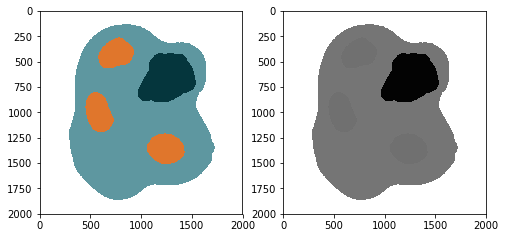

In [69]:
im = io.imread('blob1.jpg')
imgray = color.rgb2gray(im)

fig, ax = plt.subplots(1, 2, figsize=(8,4))
ax[0].imshow(im)
ax[1].imshow(imgray,  cmap='gray')

#### Edge Detection
1. Extract the outer edge of the large light blue bolb as a vector path
2. Extract the edges of each of the smaller inner blobs as separate vector paths

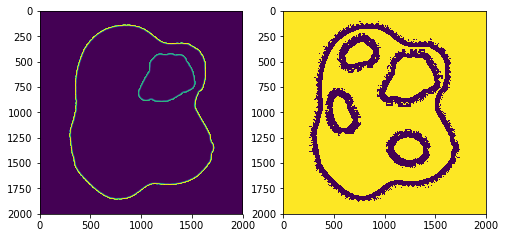

In [72]:
edges1 = filters.frangi(imgray)
edges2 = filters.hessian(imgray)

fig, ax = plt.subplots(1, 2, figsize=(8,4))
ax[0].imshow(edges1)
ax[1].imshow(edges2)

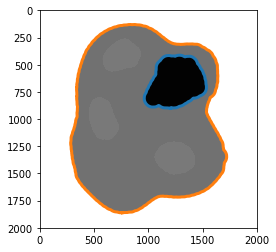

In [90]:
# Finding contours and plotting them out on original image
blob = cv2.imread('blob1.jpg')
blob = cv2.cvtColor(blob, cv2.COLOR_BGR2GRAY)

con_small = measure.find_contours(blob, 50)
con_big = measure.find_contours(blob, 200)

fig, ax = plt.subplots()
ax.imshow(blob, cmap=plt.cm.gray)

for n, contour in enumerate(con_small):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=3)

for n, contour in enumerate(con_big):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=3)
    
# somehow can't find the other small ones

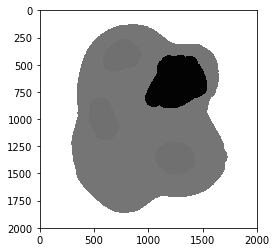

In [99]:
# Not sure why this doesn't work when image was processed through io
con_small = measure.find_contours(imgray, 50)
con_big = measure.find_contours(imgray, 200)

fig, ax = plt.subplots()
ax.imshow(imgray, cmap=plt.cm.gray)

for n, contour in enumerate(con_small):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=3)

for n, contour in enumerate(con_big):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=3)

#### Calculating Distance
How far away is the centroid of each inner blob from the nearest edge of the large blub bubble?

In [107]:
# moments
M = measure.moments(imgray)
print(M)

[[3.04759314e+06 3.05325957e+09 4.27169426e+12 6.70518230e+15]
 [3.06811789e+09 3.07972060e+12 4.30192547e+15 6.73767411e+18]
 [4.24495184e+12 4.26788261e+15 5.92440924e+18 9.21825682e+21]
 [6.58242012e+15 6.62307613e+18 9.14456440e+21 1.41516694e+25]]


1006.73474161095
1001.8593147039453


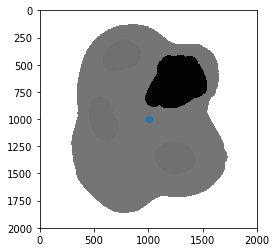

In [108]:
# center coordinates
cr = M[1, 0] / M[0, 0]
cc = M[0, 1] / M[0, 0]
print(cr)
print(cc)

fig, ax = plt.subplots()
ax.imshow(imgray, cmap=plt.cm.gray)
plt.scatter(cr, cc)

In [111]:
# area
area = M[0,0]
print(area)

3047593.136434117


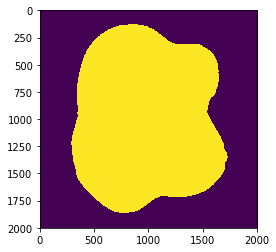

In [166]:
from skimage.filters import threshold_otsu

thresh = threshold_otsu(imgray)
bw = closing(imgray < thresh)
plt.imshow(bw)

#### Smoothing Paths
Extract the vector outline and smooth the path

#### Concentric Circles
Use the voctor shape of one of the blobs and create 10 concentric circles that radiate inwards the center

#### Area
How much area is covered by the orange?